TASK 1

In [1]:
import skimage as sk
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk, square
from skimage import img_as_ubyte
import time

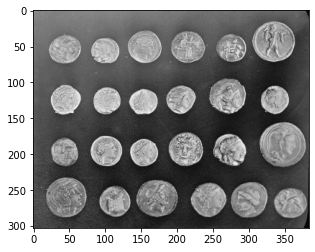

In [2]:
image = sk.data.coins()
plt.imshow(image, cmap = 'gray')
plt.show()

SALT AND PEPPER

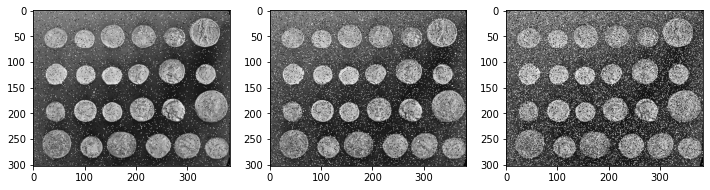

In [3]:
sp_val_table = [5,10,20]
sp_table = []

for sp_val in sp_val_table:
    sp_table.append(img_as_ubyte(sk.util.random_noise(image, 's&p', amount = sp_val/100)))
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.set_figheight(10)
ax1.imshow(sp_table[0], cmap = 'gray')
ax2.imshow(sp_table[1], cmap = 'gray')
ax3.imshow(sp_table[2], cmap = 'gray')

plt.show()


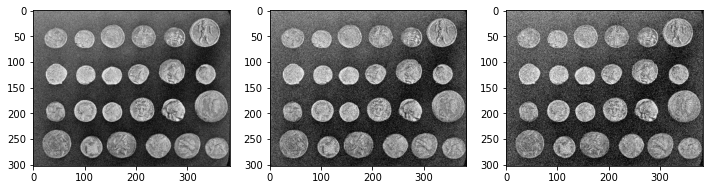

In [4]:
gaussian_val_table = [0.05, 0.08, 0.1]
gaussian_table = []
for gaussian_val in gaussian_val_table:
    gaussian_table.append(img_as_ubyte(sk.util.random_noise(image, var = gaussian_val * gaussian_val)))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.set_figheight(10)
ax1.imshow(gaussian_table[0], cmap = 'gray')
ax2.imshow(gaussian_table[1], cmap = 'gray')
ax3.imshow(gaussian_table[2], cmap = 'gray')

plt.show()

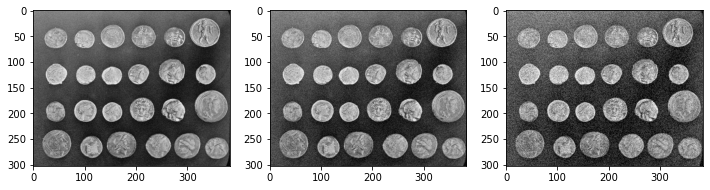

In [5]:
mask_val_table = [10, 20, 40]
mask_table = []
for mask_val in mask_val_table:
    mask_table.append(np.random.uniform(-mask_val, mask_val, image.shape))

uniform_table = []
for mask in mask_table:
    uniform_table.append(np.clip(image + mask, 0, 255).astype(np.uint8))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.set_figheight(10)
ax1.imshow(uniform_table[0], cmap = 'gray')
ax2.imshow(uniform_table[1], cmap = 'gray')
ax3.imshow(uniform_table[2], cmap = 'gray')

plt.show()

In [6]:

NMSE_table = []
errors = sp_table + gaussian_table + uniform_table
img = image/255
for error in errors:
    error = error/255
    NMSE_table.append(round(( (np.square(np.sum(error)-np.sum(img)))/ (np.sum(np.square(img)))), 9))
  
print(NMSE_table)



[22.788181138, 78.730548062, 358.296385685, 1e-09, 0.02531541, 0.786551334, 2.292070315, 2.688699428, 1.4145286]


In [7]:
def print_table(nmse_results, filter_type):
    print(f'Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) {filter_type}')
    print(f'salt and pepper 5%        | {NMSE_table[0]}      | {nmse_results[0]}')
    print(f'salt and pepper 10%       | {NMSE_table[1]}      | {nmse_results[1]}')
    print(f'salt and pepper 20%       | {NMSE_table[2]}     | {nmse_results[2]}')
    print(f'guassian 0.05             | {NMSE_table[3]}       | {nmse_results[3]}')
    print(f'guassian 0.08             | {NMSE_table[4]}       | {nmse_results[4]}')
    print(f'guassian 0.1              | {NMSE_table[5]}       | {nmse_results[5]}')
    print(f'uniform 10                | {NMSE_table[6]}       | {nmse_results[6]}')
    print(f'uniform 20                | {NMSE_table[7]}       | {nmse_results[7]}')
    print(f'uniform 40                | {NMSE_table[8]}       | {nmse_results[8]}')
    
def create_figure(results):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
    fig.set_figwidth(18)
    fig.set_figheight(18)
    ax1.imshow(results[0], cmap = 'gray')
    ax2.imshow(results[1], cmap = 'gray')
    ax3.imshow(results[2], cmap = 'gray')
    ax4.imshow(results[3], cmap = 'gray')
    ax5.imshow(results[4], cmap = 'gray')
    ax6.imshow(results[5], cmap = 'gray')
    ax7.imshow(results[6], cmap = 'gray')
    ax8.imshow(results[7], cmap = 'gray')
    ax9.imshow(results[8], cmap = 'gray')
    plt.show()

TASK 2

Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) median disk 1
salt and pepper 5%        | 22.788181138      | 5.2e-07
salt and pepper 10%       | 78.730548062      | 5.78e-07
salt and pepper 20%       | 358.296385685     | 2.4232e-05
guassian 0.05             | 1e-09       | 2.82e-07
guassian 0.08             | 0.02531541       | 1.428e-06
guassian 0.1              | 0.786551334       | 1.464e-06
uniform 10                | 2.292070315       | 3.4906e-05
uniform 20                | 2.688699428       | 3.6359e-05
uniform 40                | 1.4145286       | 2.2572e-05


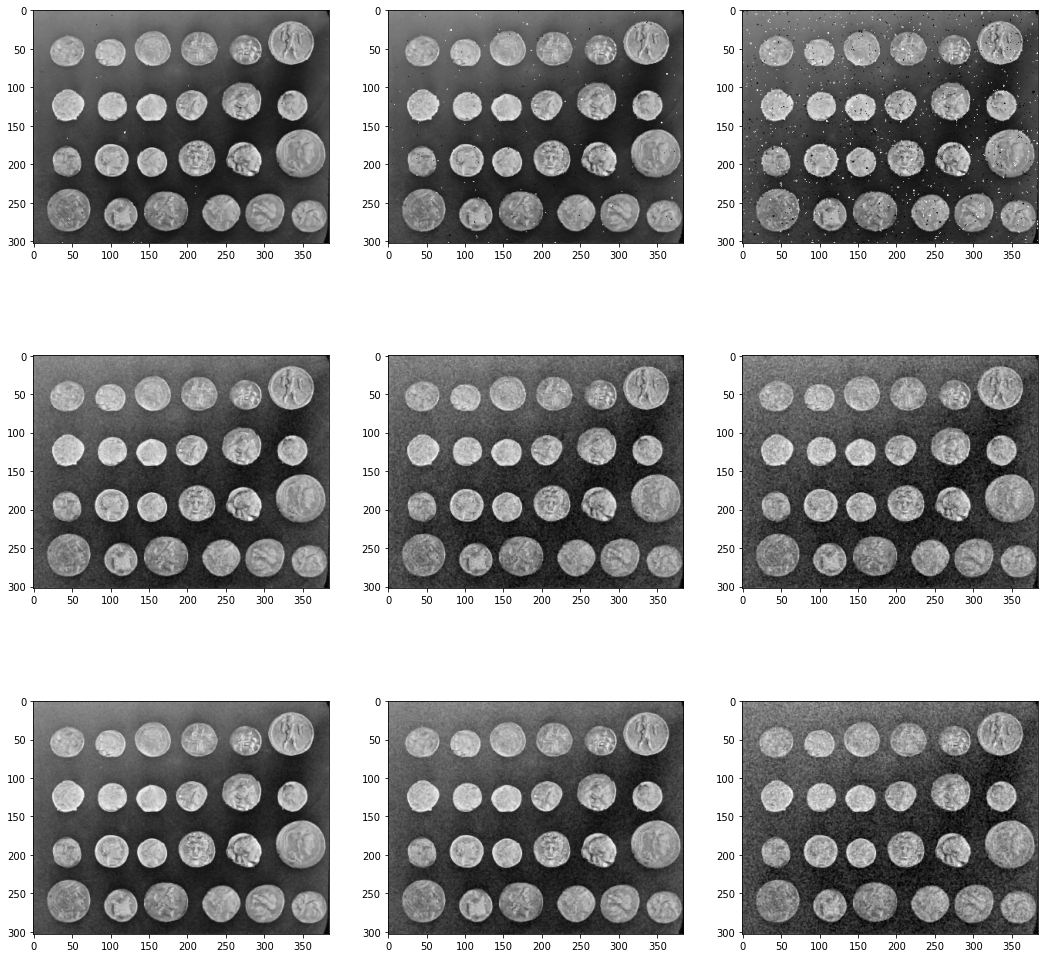

Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) median disk 2
salt and pepper 5%        | 22.788181138      | 1.4958e-05
salt and pepper 10%       | 78.730548062      | 1.8984e-05
salt and pepper 20%       | 358.296385685     | 1.3992e-05
guassian 0.05             | 1e-09       | 7.676e-06
guassian 0.08             | 0.02531541       | 1.1902e-05
guassian 0.1              | 0.786551334       | 3.81e-07
uniform 10                | 2.292070315       | 6.904e-05
uniform 20                | 2.688699428       | 6.6587e-05
uniform 40                | 1.4145286       | 3.8123e-05


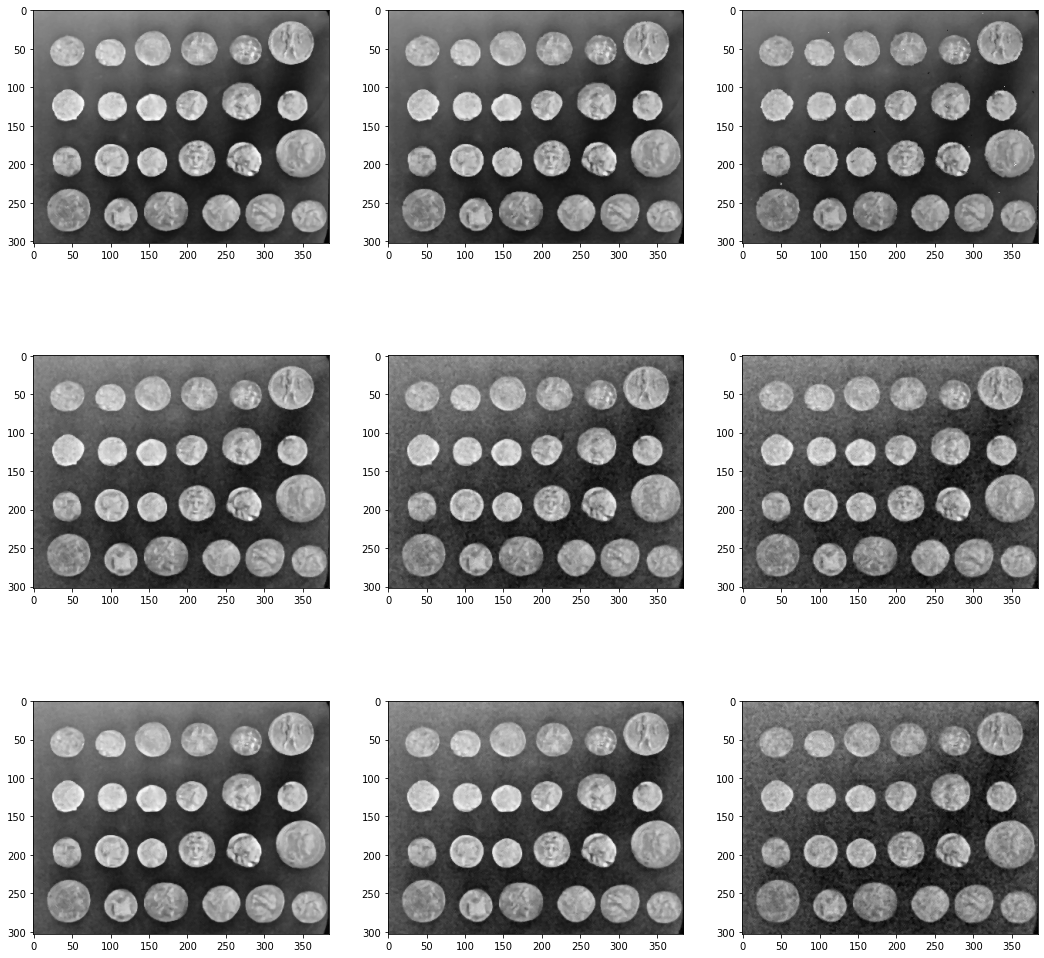

Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) median square 3
salt and pepper 5%        | 22.788181138      | 5.753e-06
salt and pepper 10%       | 78.730548062      | 7.897e-06
salt and pepper 20%       | 358.296385685     | 2.072e-06
guassian 0.05             | 1e-09       | 2.811e-06
guassian 0.08             | 0.02531541       | 5.773e-06
guassian 0.1              | 0.786551334       | 1e-09
uniform 10                | 2.292070315       | 4.9633e-05
uniform 20                | 2.688699428       | 4.9387e-05
uniform 40                | 1.4145286       | 3.0462e-05


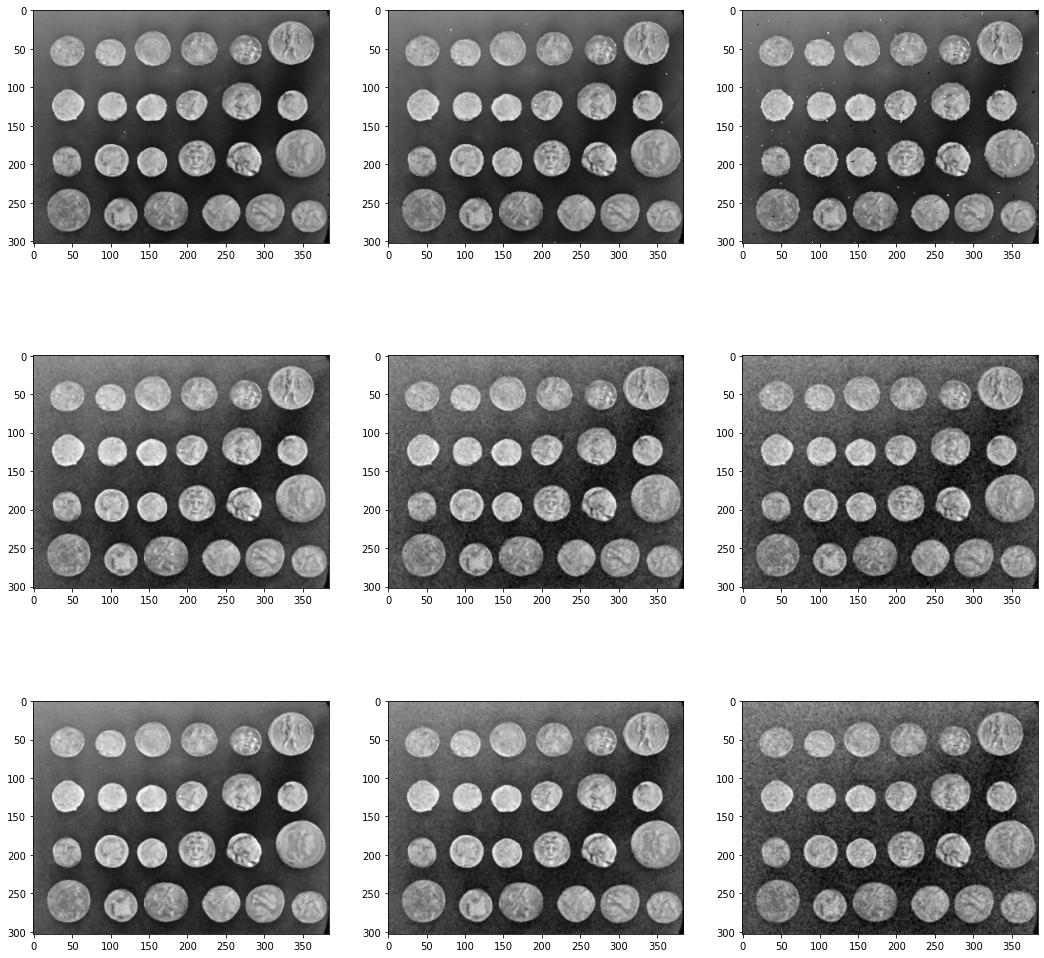

In [8]:
results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.rank.median(error, disk(1)))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'median disk 1')

create_figure(results)

results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.rank.median(error, disk(2)))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'median disk 2')

create_figure(results)

results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.rank.median(error, square(3)))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'median square 3')

create_figure(results)


Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) mean disk 1
salt and pepper 5%        | 22.788181138      | 0.000139653
salt and pepper 10%       | 78.730548062      | 0.000651627
salt and pepper 20%       | 358.296385685     | 0.003492982
guassian 0.05             | 1e-09       | 1.7011e-05
guassian 0.08             | 0.02531541       | 2.1633e-05
guassian 0.1              | 0.786551334       | 1.339e-06
uniform 10                | 2.292070315       | 8.4125e-05
uniform 20                | 2.688699428       | 9.1951e-05
uniform 40                | 1.4145286       | 6.5237e-05


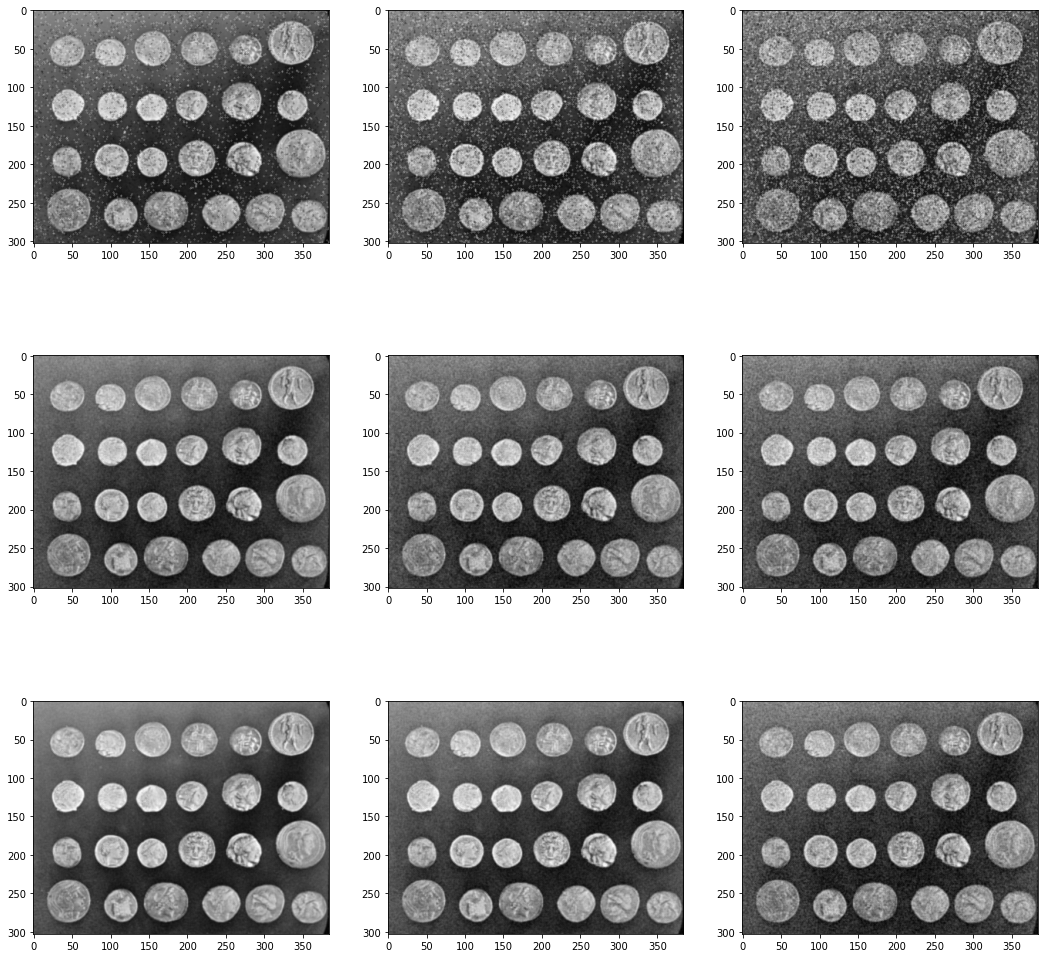

Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) mean disk 2
salt and pepper 5%        | 22.788181138      | 0.000126289
salt and pepper 10%       | 78.730548062      | 0.000622388
salt and pepper 20%       | 358.296385685     | 0.003419261
guassian 0.05             | 1e-09       | 2.2397e-05
guassian 0.08             | 0.02531541       | 2.7601e-05
guassian 0.1              | 0.786551334       | 3.105e-06
uniform 10                | 2.292070315       | 9.5787e-05
uniform 20                | 2.688699428       | 0.000104364
uniform 40                | 1.4145286       | 7.592e-05


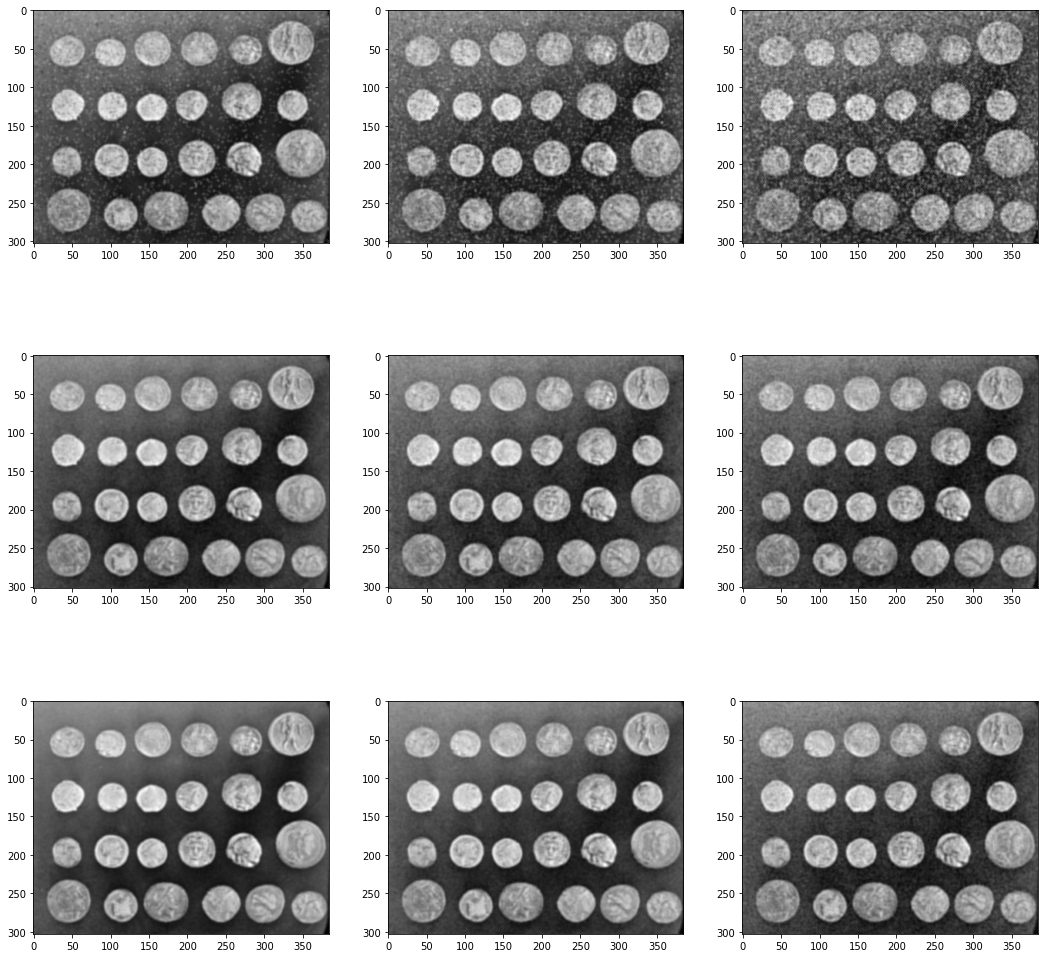

Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) mean square 3
salt and pepper 5%        | 22.788181138      | 0.000130176
salt and pepper 10%       | 78.730548062      | 0.000632118
salt and pepper 20%       | 358.296385685     | 0.003438185
guassian 0.05             | 1e-09       | 2.0757e-05
guassian 0.08             | 0.02531541       | 2.5981e-05
guassian 0.1              | 0.786551334       | 2.609e-06
uniform 10                | 2.292070315       | 9.228e-05
uniform 20                | 2.688699428       | 0.000100798
uniform 40                | 1.4145286       | 7.2588e-05


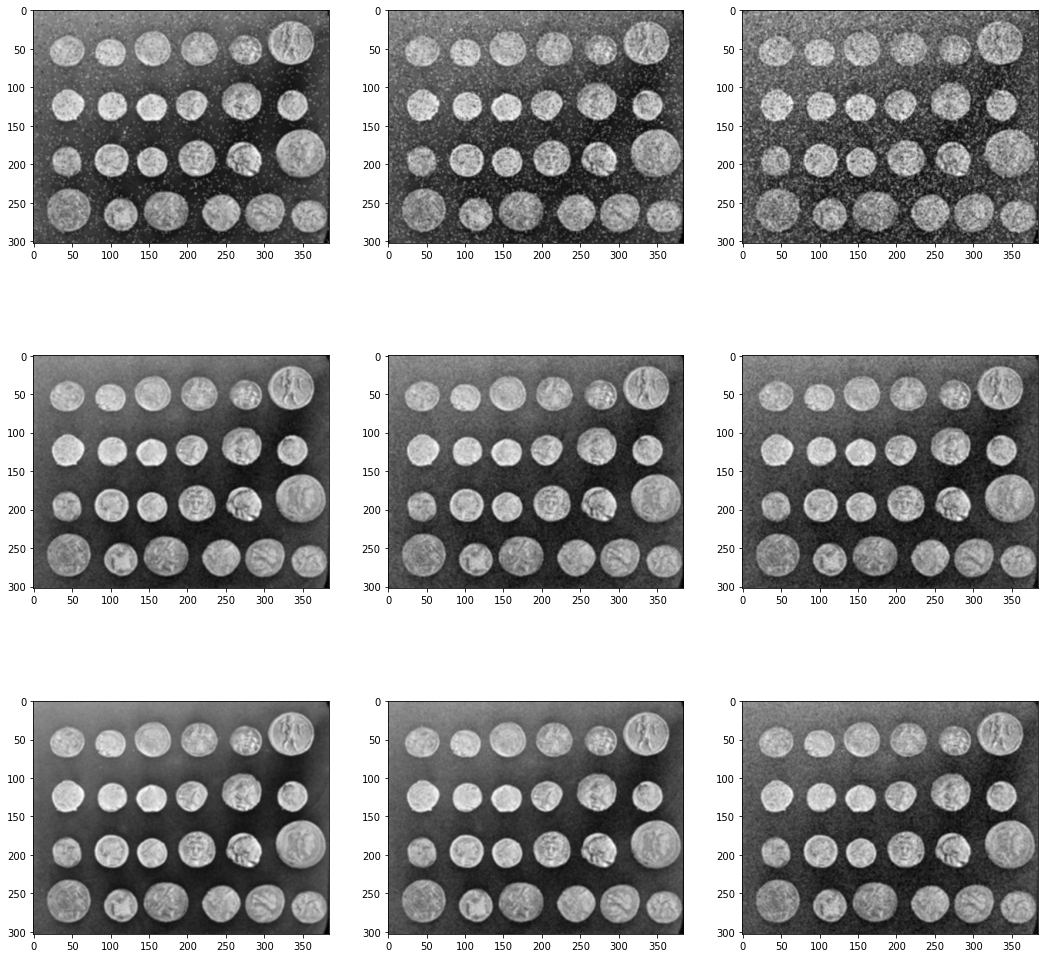

In [9]:
results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.rank.mean(error, disk(1)))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'mean disk 1')

create_figure(results)

results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.rank.mean(error, disk(2)))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'mean disk 2')

create_figure(results)

results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.rank.mean(error, square(3)))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'mean square 3')

create_figure(results)


Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) gaussian 0.5
salt and pepper 5%        | 22.788181138      | 0.000254162
salt and pepper 10%       | 78.730548062      | 0.00087844
salt and pepper 20%       | 358.296385685     | 0.003995891
guassian 0.05             | 1e-09       | 0.0
guassian 0.08             | 0.02531541       | 2.79e-07
guassian 0.1              | 0.786551334       | 8.758e-06
uniform 10                | 2.292070315       | 2.5421e-05
uniform 20                | 2.688699428       | 2.9988e-05
uniform 40                | 1.4145286       | 1.5886e-05


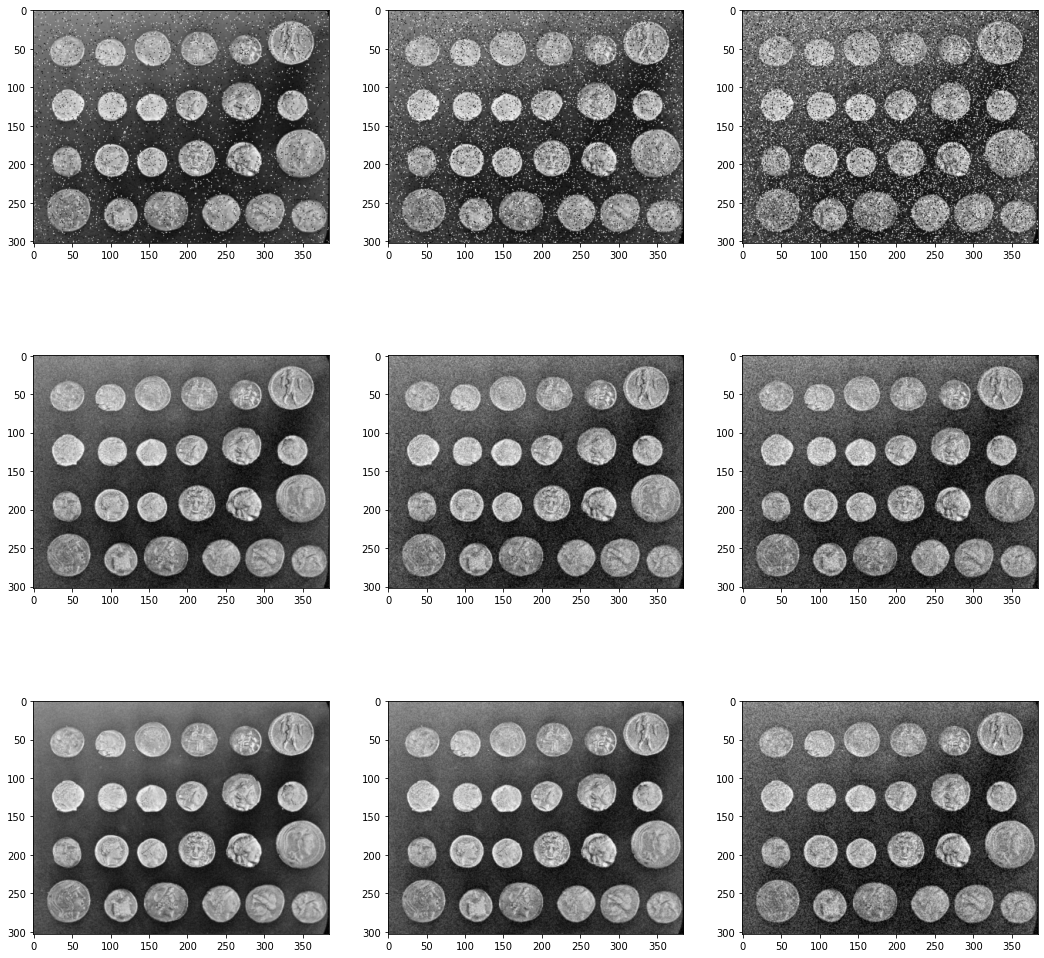

Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) gaussian 0.75
salt and pepper 5%        | 22.788181138      | 0.000254491
salt and pepper 10%       | 78.730548062      | 0.000877851
salt and pepper 20%       | 358.296385685     | 0.003997024
guassian 0.05             | 1e-09       | 0.0
guassian 0.08             | 0.02531541       | 2.83e-07
guassian 0.1              | 0.786551334       | 8.818e-06
uniform 10                | 2.292070315       | 2.5725e-05
uniform 20                | 2.688699428       | 2.9981e-05
uniform 40                | 1.4145286       | 1.5857e-05


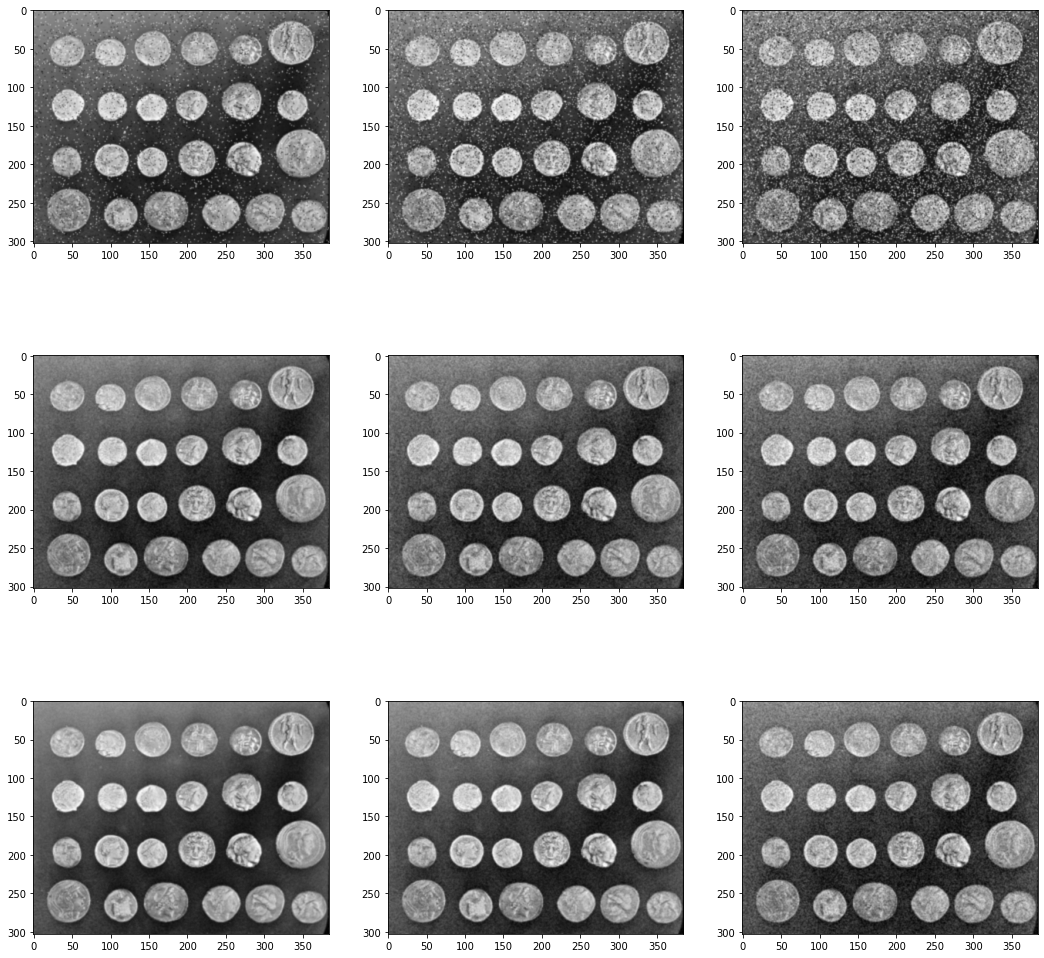

Noise type and its amount | NMSE(orig,noised) | NMSE(orig,denoised) gaussian 1
salt and pepper 5%        | 22.788181138      | 0.000253071
salt and pepper 10%       | 78.730548062      | 0.000876474
salt and pepper 20%       | 358.296385685     | 0.003998595
guassian 0.05             | 1e-09       | 0.0
guassian 0.08             | 0.02531541       | 2.89e-07
guassian 0.1              | 0.786551334       | 8.704e-06
uniform 10                | 2.292070315       | 2.5715e-05
uniform 20                | 2.688699428       | 3.0168e-05
uniform 40                | 1.4145286       | 1.5908e-05


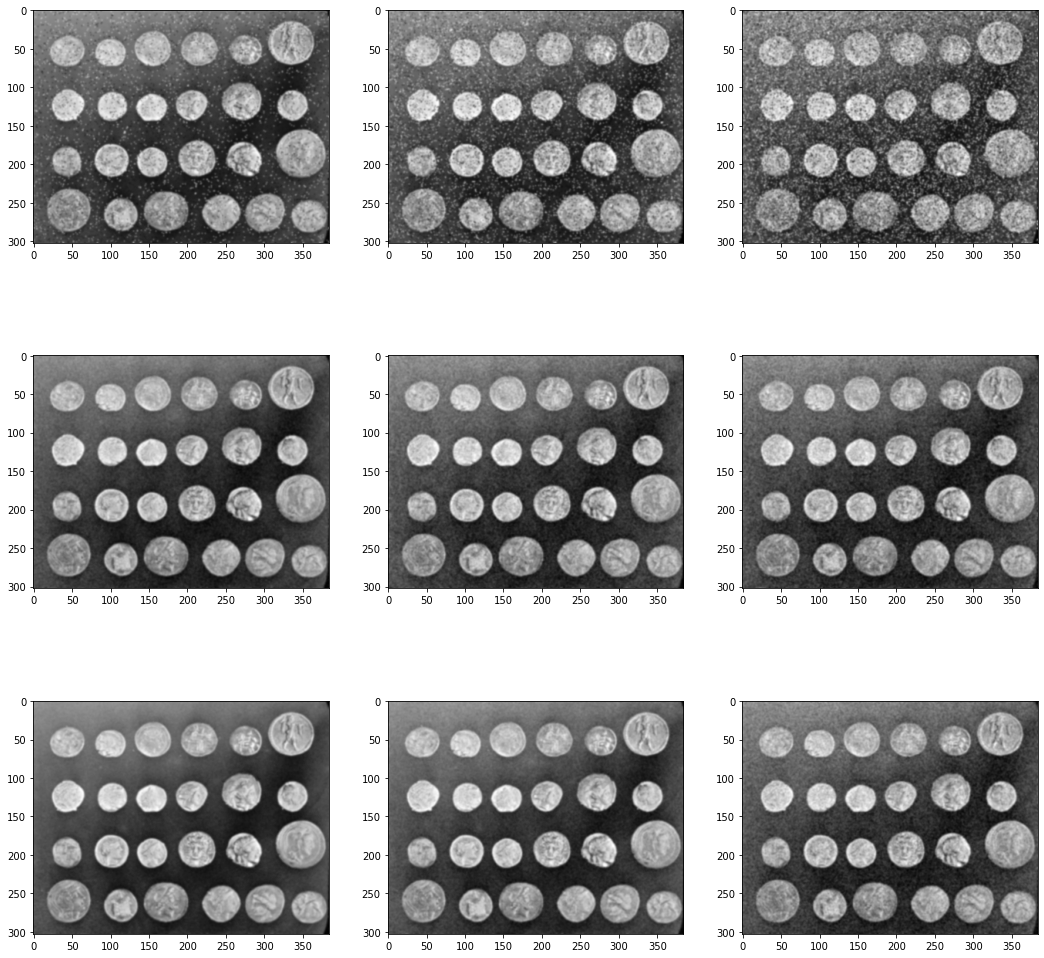

In [10]:
results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.gaussian(error, 0.5))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'gaussian 0.5')
 
create_figure(results)

results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.gaussian(error, 0.75))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'gaussian 0.75')

create_figure(results)

results = []
nmse_results = []
for error in errors:
    result = img_as_ubyte(sk.filters.gaussian(error, 1))/255
    results.append(result)
    nmse_results.append(round((np.square(np.sum(result)-np.sum(img))/np.square(np.sum(img))), 9))

print_table(nmse_results, filter_type = 'gaussian 1')

create_figure(results)
